In [4]:
# Required libraries

import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader.data import DataReader
from datetime import date
import quandl

Trade Date
2015-01-02    4726.81
2015-01-05    4652.57
2015-01-06    4592.74
2015-01-07    4650.47
2015-01-08    4736.19
Name: Index Value, dtype: float64

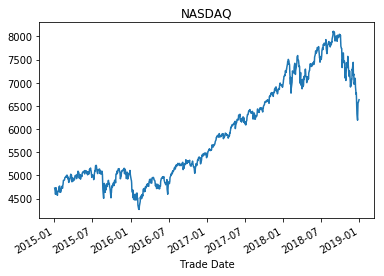

In [5]:
# Get the financial data of the NASDAQ

start = date(2015, 1, 1)
end = date(2019, 1, 1)       # Timeframe of analysis

index_ref = quandl.get('NASDAQOMX/COMP-NASDAQ', start_date = start, end_date = end)['Index Value']
index_ref.plot(title = 'NASDAQ')

index_ref.head()             # index_ref is a Pandas Serie

In [6]:
# Get the financial data of the stocks

stocks_data = pd.read_excel(r'Listings.xlsx', sheet_name='nasdaq')

stocks_ticker = stocks_data['Stock Symbol']
stocks_ticker_list = stocks_ticker.tolist()    #list containing all the tickers

limited_list = stocks_ticker_list[:15]  # to work on a small sample

stocks_data = stocks_data.set_index('Stock Symbol')

stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3167 entries, AAPL to ZIONZ
Data columns (total 3 columns):
Company Name    3167 non-null object
Sector          2767 non-null object
Industry        2767 non-null object
dtypes: object(3)
memory usage: 99.0+ KB


Symbols,AAPL,AMGN,AMZN,CELG,CHTR,CMCSA,CSCO,FB,GILD,GOOG,GOOGL,INTC,KHC,MSFT,WBA
date,,,,,,,,,,,,,,,
2015-01-02,101.5280,143.2089,308.52,113.52,166.43,26.5571,24.2375,78.450,85.5094,524.81,529.55,32.2114,NaN,42.4187,69.8541
2015-01-05,98.6678,141.5071,302.19,111.93,160.50,26.0155,23.7546,77.190,87.1987,513.87,519.46,31.8482,NaN,42.0241,68.4754
2015-01-06,98.6771,136.9481,295.29,110.51,156.31,25.6761,23.7459,76.150,87.9780,501.96,506.64,31.2546,NaN,41.4118,68.6501
2015-01-07,100.0607,141.7310,298.42,114.55,156.79,25.6529,23.9653,76.150,89.6268,501.10,505.15,31.9102,NaN,41.9379,70.4056
2015-01-08,103.9053,141.2205,300.46,115.05,162.94,26.2107,24.1497,78.175,92.1675,502.68,506.91,32.5037,NaN,43.1716,71.2788


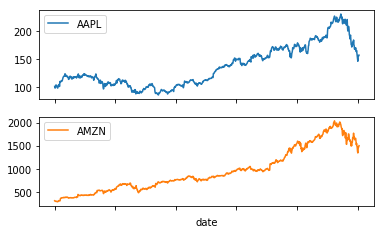

In [7]:
ticker = limited_list[:]

stocks = DataReader(ticker, 'iex', start, end)['close']   # daily market price

stocks.loc[:, ['AAPL', 'AMZN']].plot(subplots=True)   # need the date on x-axis

stocks.head()

Trade Date
2015-01-02         NaN
2015-01-05   -1.570615
2015-01-06   -1.285956
2015-01-07    1.256984
2015-01-08    1.843255
Name: Index Value, dtype: float64

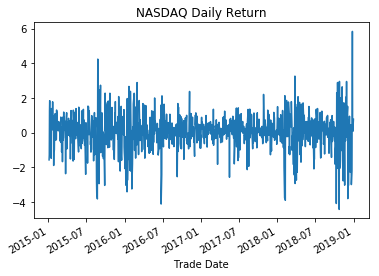

In [8]:
# Calculate daily return of NASDAQ

index_daily_return = index_ref.pct_change() * 100  # *100 for having in %

index_daily_return.plot(title='NASDAQ Daily Return')
index_daily_return.head()

In [1]:
# Calculate stocks daily return

stocks_daily_return = stocks.pct_change() * 100   

stocks_daily_return.plot(figsize = (15, 5), kind = 'box', title='Stocks Daily return')
stocks_daily_return.head()

NameError: name 'stocks' is not defined

,Daily return
Symbols,
AAPL,0.055401
AMGN,0.041093
AMZN,0.175961
CELG,-0.037637
CHTR,0.069839


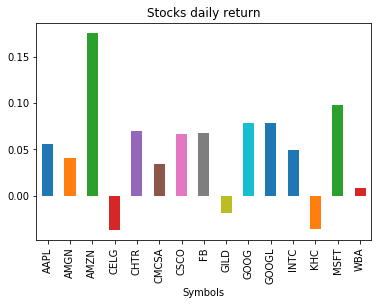

In [107]:
# Calculate the average daily return

avg_index_daily_return = index_daily_return.mean()
avg_stocks_daily_return = stocks_daily_return.mean()

avg_stocks_daily_return.plot(kind = 'bar', title = 'Stocks daily return')

avg_stocks_daily_return_df = pd.DataFrame(avg_stocks_daily_return)
avg_stocks_daily_return_df.columns = ['Daily return']

avg_stocks_daily_return_df.head()

In [113]:
avg_index_daily_return

0.03904821107576447

,Volatility
Symbols,
AAPL,1.548310
AMGN,1.502969
AMZN,1.930075
CELG,1.952415
CHTR,1.808698


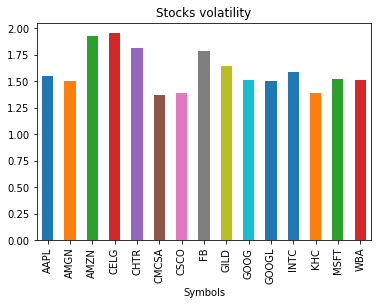

In [108]:
# Calculate the risk of each investment

index_volatility = index_daily_return.std()

stocks_volatility = stocks_daily_return.std()

stocks_volatility.plot(kind = 'bar', title = 'Stocks volatility')

stocks_volatility_df = pd.DataFrame(stocks_volatility)
stocks_volatility_df.columns = ['Volatility']

stocks_volatility_df.head()

In [114]:
# Calculate each stock Sharpe Ratio

stocks_SharpeRatio = (avg_stocks_daily_return - avg_index_daily_return) / stocks_volatility

stocks_SharpeRatio.head()

stocks_SharpeRatio_df = pd.DataFrame(stocks_SharpeRatio)
stocks_SharpeRatio_df.columns = ['Sharpe Ratio']

stocks_SharpeRatio_df.head()

,Sharpe Ratio
Symbols,
AAPL,0.010562
AMGN,0.001361
AMZN,0.070937
CELG,-0.039277
CHTR,0.017024


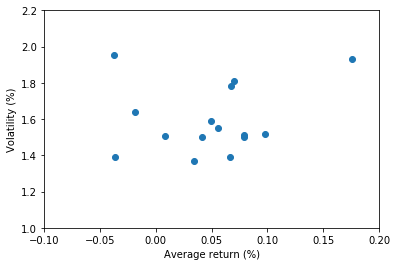

In [115]:
plt.axis([-0.1, 0.2, 1, 2.2])

plt.scatter(avg_stocks_daily_return, stocks_volatility)
plt.xlabel('Average return (%)')
plt.ylabel('Volatility (%)')

plt.show()

In [117]:
#stocks_data_sectors = stocks_data.groupby('Sector')

y = stocks_data[:15]
#pd.merge(left = y, right = avg_stocks_daily_return_df, on = None, left_on = 'Stock Symbol', right_on = 'Daily return')
y = pd.concat([y, avg_stocks_daily_return_df, stocks_volatility_df, stocks_SharpeRatio_df], axis=1, sort=False)

y.head()

,Company Name,Sector,Industry,Daily return,Volatility,Sharpe Ratio
AAPL,Apple Inc.,Technology,Computer Manufacturing,0.055401,1.548310,0.010562
GOOGL,Alphabet Inc.,Technology,"Computer Software: Programming, Data Processing",0.078775,1.499629,0.026491
GOOG,Alphabet Inc.,Technology,"Computer Software: Programming, Data Processing",0.078939,1.511036,0.026400
MSFT,Microsoft Corporation,Technology,Computer Software: Prepackaged Software,0.097975,1.518697,0.038801
AMZN,"Amazon.com, Inc.",Consumer Services,Catalog/Specialty Distribution,0.175961,1.930075,0.070937


In [124]:
# Sector analysis : Daily return
return_by_sector = y.groupby('Sector')['Daily return'].mean()

return_by_sector = pd.DataFrame(return_by_sector)
return_by_sector.columns = ['Daily return']

return_by_sector

,Daily return
Sector,
Consumer Non-Durables,-0.036490
Consumer Services,0.093302
Health Care,-0.001608
Technology,0.070631


In [125]:
# Sector analysis :  Volatility

volatility_by_sector = y.groupby('Sector')['Volatility'].mean()

volatility_by_sector = pd.DataFrame(volatility_by_sector)
volatility_by_sector.columns = ['Volatility']

volatility_by_sector

,Volatility
Sector,
Consumer Non-Durables,1.389738
Consumer Services,1.702050
Health Care,1.650945
Technology,1.548932


In [126]:
# Sector analysis : Sharpe Ratio

sharpe_ratio_by_sector = y.groupby('Sector')['Sharpe Ratio'].mean()
sharpe_ratio_by_sector = pd.DataFrame(sharpe_ratio_by_sector)
sharpe_ratio_by_sector.columns = ['Sharpe Ratio']

sharpe_ratio_by_sector

,Sharpe Ratio
Sector,
Consumer Non-Durables,-0.054354
Consumer Services,0.028115
Health Care,-0.023295
Technology,0.020635
